# Байесовский классификатор

Обучающая выборка
$$
    (x^{(i)}, y^{(i)}) 
\qquad
    y^{(i)} \in {\cal Y} = \{1,2,\dots,K\}
    \qquad (i=1,2,\dots,N)
$$


${\rm Pr}\{Y=y\}$ – _априорная вероятность_

${\rm Pr}\{Y=y\mid X=x\}$ – _апостериорная вероятность_

$p(x\mid Y = y)$ – _правдоподобие_

$$
p(x,y)={\rm Pr}(y) p(x\mid y).
$$


$L(k \mid y)$ – _функция потерь_ (штрафная функция).
Например,
$$
    L(f(x) \mid y) = I(f(x) \ne y) =
    \left\{
        \begin{array}{ll}
            0, & \mbox{если $f(x) = y$,} \\
            1, & \mbox{если $f(x) \ne y$.}
        \end{array}
    \right.
$$



_Средний_ (_ожидаемый_) _риск_
– это математическое ожидание функции потерь:
$$
  R(f) = {\sf E} L\left(\strut f(X) \mid Y\right) 
          = {\sf E} \left( \sum_{y=1}^K L\left(\strut f(x) \mid y\right) \cdot {\rm Pr}(y \mid x) \right).
$$


Наша задача – минимизировать $R(f)$:
$$
    f(x) = {\rm argmin}_{k\in{\cal Y}} {\sf E} \left( \sum_{y=1}^K L\left(k \mid y\right) \cdot {\rm Pr}(y \mid x) \right).
$$


Для рассматриваемой функции потерь $R(f)$ – вероятность ошибки и 
$$
    f^*(x) = {\rm argmin}_{k\in{\cal Y}} \left( \strut 1 - {\rm Pr}(k\mid x) \right),                 
$$

или, что эквивалентно,
$$
    f^*(x) = {\rm argmax}_{y\in{\cal Y}} {\rm Pr}(y \mid x).
$$


или, так как ${\rm Pr}(y\mid x) = p(x\mid y) {\rm Pr}(y) / p(x)$,
$$
    f^*(x) = {\rm argmax}_{y\in{\cal Y}} p(x\mid y) {\rm Pr}(y).
$$





Функция $f(x)$, найденная по этим формулам,
называется _байесовым решающим правилом_, или _байесовым классификатором_,
а $R(f)$ – _байесовой ошибкой_.

${\rm Pr}(y \mid x)$ – это _апостериорная вероятность_ появления объекта из класса $y$,
поэтому принцип ее максимизации называется _принципом максимума апостериорной вероятности_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

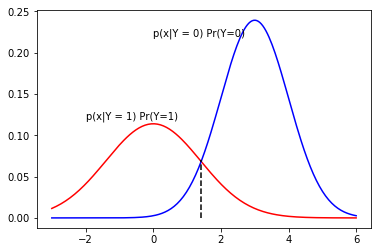

In [2]:
from scipy.stats import norm
x = np.linspace(-3, 6, 200)
p0 = norm.pdf(x, 0, 1.4)*.4
p1 = norm.pdf(x, 3)*.6
plt.plot(x, p0, 'r', x, p1, 'b')
plt.text(-2, .12, 'p(x|Y = 1) Pr(Y=1)')
plt.text(0, .22, 'p(x|Y = 0) Pr(Y=0)')
x0=1.4
y0=.07
plt.plot([x0, x0], [0, y0], '--k')
pass

Если классы равновероятны, т. е. ${\rm Pr}(y)=1/K$, то 
$$
     {\rm Pr}(y\mid x) = \frac{p(x\mid y) {\rm Pr}(y)}{p(x)} = \frac{p(x\mid y)}{K p(x)} \qquad \left(p(x) \ne 0\strut \right)
$$ 

и, так как $p(x)$ не зависит от $y$,
$$
    f(x) = {\rm argmax}_{y} p(x\mid y).
$$

Плотность $p(x\mid y)$ называется _правдоподобием_ (_likelihood_),
поэтому принцип максимизации $p(x\mid y)$ называется
_методом максимального правдоподобия_ (_maximum-likelihood method_).

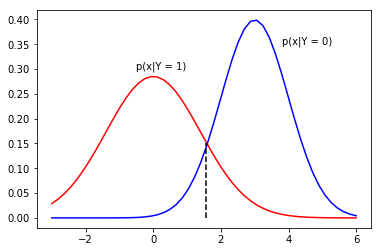

In [3]:
x = np.linspace(-3, 6)
p0 = norm.pdf(x, 0, 1.4)
p1 = norm.pdf(x, 3)
plt.plot(x, p0, 'r', x, p1, 'b')
plt.text(-.5, .3, 'p(x|Y = 1)')
plt.text(3.8, .35, 'p(x|Y = 0)')
x0=1.57
y0=.15
plt.plot([x0, x0], [0, y0], '--k')
pass

_Чтобы построить байесов классификатор, мы должны знать (или оценить) ${\rm Pr}\, y$, ${\rm Pr} (y\mid x)$_

# Наивный байесовский классификатор

Пусть все компоненты случайной величины $X=(X_1,\dots,X_d)$ дискретны, т. е. все признаки номинальны


$$
{\rm Pr}\,\{Y = y \mid X = x\} = \frac{{\rm Pr}\,\{X = x\mid Y = y\} \cdot{\rm Pr}\,\{Y = y\}}{{\rm Pr}\,\{X = x\}}
=
$$
$$
=
\frac{{\rm Pr}\,\{X = x\mid Y = y\} \cdot{\rm Pr}\,\{Y = y\}}{\sum_{y'} {\rm Pr}\,\{X = x\mid Y = y'\} \cdot{\rm Pr}\,\{Y = y'\}}
$$


_Основное предположение наивного байесовского классификатора:_

переменные $X_1,\dots, X_d$ _условно независимы_ при любом заданном $Y=y$, 
т. е.

$$
{\rm Pr}\,\{X_1=x_1,\dots, X_d=x_d \mid Y=y\} = {\rm Pr}\,\{X_1 = x_1 \mid Y=y\}\cdot\dots\cdot {\rm Pr}\,\{X_d = x_d \mid Y=y\},
$$

или, короче,
$$
{\rm Pr}\,\{X=x \mid Y=y\} = \prod_{j=1}^d {\rm Pr}\,\{X_j = x_j \mid Y=y\}.
$$

По принципу максимума апостериорной вероятности
$$
f(x) = {\rm argmax}_y {\rm Pr}\,\{Y=y\mid X=x\} 
= {\rm argmax}_y \left({\rm Pr}\,\{Y=y\}\cdot \prod_{j=1}^d {\rm Pr}\,\{X_j = x_j \mid Y=y\}\right).
$$

Вероятности заменяем частотой:


$$
{\rm Pr}\,\{Y = y\} \approx \frac{1}{N} |\{i:~y^{(i)} = y\}|,
\qquad
{\rm Pr}\,\{X_j = x_j \mid Y = y\} \approx \frac{|\{i:~{x_j^{(i)} = x_j, y^{(i)} = y}\}|}{|\{i:~y^{(i)} = y\}|}.
$$



## Пример
 
 $$
 \begin{array}{c|c|c|c|c}
  №  & x_1 & x_2 & x_3 &  y  \\\hline
  1  &  0  &  0  &  0  &  0  \\
  2  &  0  &  1  &  0  &  0  \\
  3  &  0  &  1  &  1  &  0  \\
  4  &  0  &  0  &  1  &  0  \\
  5  &  0  &  1  &  0  &  0  \\
  6  &  1  &  0  &  1  &  0  \\
  7  &  0  &  1  &  0  &  1  \\
  8  &  1  &  1  &  0  &  1  \\
  9  &  0  &  1  &  1  &  1  \\
 10  &  1  &  0  &  1  &  1  \\
 \end{array}
 $$
 
Как, например, оценить ${\rm Pr}\, (Y = 0 \mid x_1 = x_2 = x_3 = 1)$
или $(Y = 0 \mid x_1 = x_2 = 0,~ x_3 = 1)$?
 
Аппроксимации априорных вероятностей:
$$
 {\rm Pr}\, (Y = 0) = \frac{6}{10} = \frac{3}{5},
 \qquad
 {\rm Pr}\, (Y = 1) = \frac{4}{10} = \frac{2}{5}
$$

Аппроксимации маргинальных апостериорных вероятностей:
$$
\begin{array}{llll}
 {\rm Pr}\, (x_1 = 0 \mid Y = 0) = \frac{5}{6},
&
 {\rm Pr}\, (x_1 = 1 \mid Y = 0) = \frac{1}{6},
&
 {\rm Pr}\, (x_1 = 0 \mid Y = 1) = \frac{2}{4} = \frac{1}{2},
&
 {\rm Pr}\, (x_1 = 1 \mid Y = 1) = \frac{2}{4} = \frac{1}{2},
\\
 {\rm Pr}\, (x_2 = 0 \mid Y = 0) = \frac{3}{6} = \frac{1}{2},
&
 {\rm Pr}\, (x_2 = 1 \mid Y = 0) = \frac{3}{6} = \frac{1}{2},
&
 {\rm Pr}\, (x_2 = 0 \mid Y = 1) = \frac{1}{4},
&
 {\rm Pr}\, (x_2 = 1 \mid Y = 1) = \frac{3}{4},
\\
 {\rm Pr}\, (x_3 = 0 \mid Y = 0) = \frac{3}{6} = \frac{1}{2},
&
 {\rm Pr}\, (x_3 = 1 \mid Y = 0) = \frac{3}{6} = \frac{1}{2},
&
 {\rm Pr}\, (x_3 = 0 \mid Y = 1) = \frac{2}{4} = \frac{1}{2},
&
 {\rm Pr}\, (x_3 = 1 \mid Y = 1) = \frac{2}{4} = \frac{1}{2}
\\
\end{array}
$$


Вычисляем апостериорные вероятности.

Например,

$$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = 0,~ x_3 = 1) = \frac{
{\rm Pr}\, (x_1 = 0 \mid Y = 0) \cdot
{\rm Pr}\, (x_2 = 0 \mid Y = 0) \cdot 
{\rm Pr}\, (x_3 = 1 \mid Y = 0) \cdot {\rm Pr}\,\{Y = 0\}}{{\rm Pr}\, (x_1 = x_2 = 0,~ x_3 = 1)}
= \frac{\frac{5}{6}\cdot\frac{1}{2}\cdot\frac{1}{2}\cdot\frac{3}{5}}{\frac{1}{10}}
= \frac{\frac{1}{8}}{\frac{1}{10}}
= \frac{5}{4}?!?
$$

$$
{\rm Pr}\, (Y = 1 \mid x_1 = x_2 = 0,~ x_3 = 1) = \frac{
{\rm Pr}\, (x_1 = 0 \mid Y = 1) \cdot
{\rm Pr}\, (x_2 = 0 \mid Y = 1) \cdot 
{\rm Pr}\, (x_3 = 1 \mid Y = 1) \cdot {\rm Pr}\,\{Y = 1\}}{{\rm Pr}\, (x_1 = x_2 = 0,~ x_3 = 1)}
= \frac{\frac{1}{2}\cdot\frac{1}{4}\cdot\frac{1}{2}\cdot\frac{2}{5}}{\frac{1}{10}}
= \frac{\frac{1}{40}}{\frac{1}{10}}
= \frac{1}{4}
$$

Вот как правильно:

$$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = 0, x_3 = 1) = \frac{\frac{1}{8}}{\frac{1}{8} + \frac{1}{40}} = \frac{5}{6},
\qquad
{\rm Pr}\, (Y = 1 \mid x_1 = x_2 = 0, x_3 = 1) = \frac{\frac{1}{40}}{\frac{1}{8} + \frac{1}{40}} = \frac{1}{6}.
$$



Еще:



$$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = x_3 = 1) = \frac{
{\rm Pr}\, (x_1 = 1 \mid Y = 0) \cdot
{\rm Pr}\, (x_2 = 1 \mid Y = 0) \cdot 
{\rm Pr}\, (x_3 = 1 \mid Y = 0) \cdot {\rm Pr}\,\{Y = 0\}}{{\rm Pr}\, (x_1 = x_2 = x_3 = 1)}
= \frac{\frac{1}{6}\cdot\frac{1}{2}\cdot\frac{1}{2}\cdot\frac{3}{5}}{?}
= \frac{\frac{1}{40}}{?}
$$

$$
{\rm Pr}\, (Y = 1 \mid x_1 = x_2 = x_3 = 1) = \frac{
{\rm Pr}\, (x_1 = 1 \mid Y = 1) \cdot
{\rm Pr}\, (x_2 = 1 \mid Y = 1) \cdot 
{\rm Pr}\, (x_3 = 1 \mid Y = 1) \cdot {\rm Pr}\,\{Y = 1\}}{{\rm Pr}\, (x_1 = x_2 = x_3 = 1)}
= \frac{\frac{1}{2}\cdot\frac{3}{4}\cdot\frac{1}{2}\cdot\frac{2}{5}}{?}
= \frac{\frac{3}{40}}{?}
$$

$$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = x_3 = 1) = \frac{\frac{1}{40}}{\frac{1}{40} + \frac{3}{40}} = \frac{1}{4},
\qquad
{\rm Pr}\, (Y = 1 \mid x_1 = x_2 = x_3 = 1) = \frac{\frac{3}{40}}{\frac{1}{40} + \frac{3}{40}} = \frac{3}{4}.
$$



## Сглаживание Лапласа

$$
 \begin{array}{c|c|c|c|c}
  №  & x_1 & x_2 & x_3 &  y  \\\hline
  1  &  0  &  0  &  0  &  0  \\
  2  &  0  &  1  &  0  &  0  \\
  3  &  0  &  1  &  1  &  0  \\
  4  &  0  &  0  &  1  &  0  \\
  5  &  0  &  1  &  0  &  0  \\
  6  &  1  &  0  &  1  &  0  \\
  7  &  0  &  1  &  0  &  1  \\
  8  &  1  &  1  &  0  &  1  \\
  9  &  0  &  1  &  1  &  1  \\
 10  &  1  &  0  &  1  &  1  \\
 \end{array}
 $$
 
Как оценить
$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = 0,~ x_3 = 2) 
$?

$$
{\rm Pr}\, (x_3 = 2 \mid Y = 0) = {\rm Pr}\, (x_3 = 2 \mid Y = 1) = 0
$$

$$
{\rm Pr}\, (x_1 = 0 \mid Y = 0) \cdot
{\rm Pr}\, (x_2 = 0 \mid Y = 0) \cdot 
{\rm Pr}\, (x_3 = 2 \mid Y = 0) \cdot {\rm Pr}\,\{Y = 0\}
=0
$$

$$
{\rm Pr}\, (x_1 = 0 \mid Y = 1) \cdot
{\rm Pr}\, (x_2 = 0 \mid Y = 1) \cdot 
{\rm Pr}\, (x_3 = 2 \mid Y = 1) \cdot {\rm Pr}\,\{Y = 1\}
=0
$$


$$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = 0,~ x_3 = 2) = \frac{0}{0+0},
\qquad
{\rm Pr}\, (Y = 1 \mid x_1 = x_2 = 0,~ x_3 = 2) = \frac{0}{0+0},
$$

Что делать?

Сглаживание Лапласа:

$$
\Pr\{X_j = x_j \mid Y = y\} \approx \frac{|\{i:~{x_j^{(i)} = x_j,~ y^{(i)} = y}\}| + 1}{|\{i:~y^{(i)} = y\}| + s_j},
$$
где $s_j$ – количество значений, которые принимает признак $x_j$.

Легко видеть, что тогда
$$
\sum_{x_j} \frac{|\{i:~{x_j^{(i)} = x_j,~y^{(i)} = y}\}| + 1}{|\{i:~y^{(i)} = y\}| + s_j} = 1,
$$



## Возвращаемся к примеру

$$
 \begin{array}{c|c|c|c|c}
  №  & x_1 & x_2 & x_3 &  y  \\\hline
  1  &  0  &  0  &  0  &  0  \\
  2  &  0  &  1  &  0  &  0  \\
  3  &  0  &  1  &  1  &  0  \\
  4  &  0  &  0  &  1  &  0  \\
  5  &  0  &  1  &  0  &  0  \\
  6  &  1  &  0  &  1  &  0  \\
  7  &  0  &  1  &  0  &  1  \\
  8  &  1  &  1  &  0  &  1  \\
  9  &  0  &  1  &  1  &  1  \\
 10  &  1  &  0  &  1  &  1  \\
 \end{array}
 $$

Аппроксимации априорных вероятностей (не изменились):
$$
 {\rm Pr}\, (Y = 0) = \frac{6}{10} = \frac{3}{5},
 \qquad
 {\rm Pr}\, (Y = 1) = \frac{4}{10} = \frac{2}{5}
$$

Аппроксимации маргинальных апостериорных вероятностей:
$$
\begin{array}{llll}
 {\rm Pr}\, (x_1 = 0 \mid Y = 0) = \frac{6}{8} = \frac{3}{4},
&
 {\rm Pr}\, (x_1 = 1 \mid Y = 0) = \frac{2}{8} = \frac{1}{4},
&
 {\rm Pr}\, (x_1 = 0 \mid Y = 1) = \frac{3}{6} = \frac{1}{2},
&
 {\rm Pr}\, (x_1 = 1 \mid Y = 1) = \frac{3}{6} = \frac{1}{2},
\\
 {\rm Pr}\, (x_2 = 0 \mid Y = 0) = \frac{}{},
&
 {\rm Pr}\, (x_2 = 1 \mid Y = 0) = \frac{}{},
&
 {\rm Pr}\, (x_2 = 0 \mid Y = 1) = \frac{}{},
&
 {\rm Pr}\, (x_2 = 1 \mid Y = 1) = \frac{}{},
\\
 {\rm Pr}\, (x_3 = 0 \mid Y = 0) = \frac{}{},
&
 {\rm Pr}\, (x_3 = 1 \mid Y = 0) = \frac{}{},
&
 {\rm Pr}\, (x_3 = 0 \mid Y = 1) = \frac{}{},
&
 {\rm Pr}\, (x_3 = 1 \mid Y = 1) = \frac{}{}
\\
\end{array}
$$


Вычисляем апостериорные вероятности.

Например,

$$
{\rm Pr}\, (Y = 0 \mid x_1 = x_2 = 0,~ x_3 = 2) = \frac{
{\rm Pr}\, (x_1 = 0 \mid Y = 0) \cdot
{\rm Pr}\, (x_2 = 0 \mid Y = 0) \cdot 
{\rm Pr}\, (x_3 = 2 \mid Y = 0) \cdot {\rm Pr}\,\{Y = 0\}}{{\rm Pr}\, (x_1 = x_2 = 0,~ x_3 = 2)}
= \frac{}{}
$$

$$
{\rm Pr}\, (Y = 1 \mid x_1 = x_2 = 0,~ x_3 = 2) = \frac{
{\rm Pr}\, (x_1 = 0 \mid Y = 1) \cdot
{\rm Pr}\, (x_2 = 0 \mid Y = 1) \cdot 
{\rm Pr}\, (x_3 = 2 \mid Y = 1) \cdot {\rm Pr}\,\{Y = 1\}}{{\rm Pr}\, (x_1 = x_2 = 0,~ x_3 = 2)}
= \frac{}{}
$$



## Наивный Байес для количественных признаков

Два подхода:
- дискретизация;
- оценка параметров распределения.

Рассмотрим второй подход.

$$
{\rm Pr}\,\{Y = y \mid X = x\} = \frac{p(x) \cdot{\rm Pr}\,y}{p(x)}
=
\frac{p(x \mid y) \cdot{\rm Pr}\,y}{\sum_{y'} p(x \mid y') \cdot{\rm Pr}\,y'}
$$



Основное предположение:
$$
p(x\mid y) = p(x_1\mid y)p(x_2\mid y)\dots p(x_d\mid y)
$$

Предположим, например, что $p(x_j\mid y)$ нормальное:
$$
p(x_j\mid y) = \frac{1}{\sqrt{2\pi}\sigma_j} e^{-\frac{(x-\mu_j)^2}{2\sigma_j^2}}
$$
Оцениваем $\mu_j$, $\sigma_j$ по выборке.
